In [1]:
# import the required libraries
from czitools import pylibczirw_metadata as czimd
from czitools import pylibczirw_tools as czird
from czitools import misc, napari_tools
from ipyfilechooser import FileChooser
from IPython.display import display, HTML
import napari
from pathlib import Path
import os

In [2]:
defaultdir = Path(os.getcwd()).resolve().parents[0]
fc = FileChooser(defaultdir)
fc.filter_pattern = '*.czi'
display(fc)

FileChooser(path='F:\Github\ZEN_Python_OAD_workshop\workshop', filename='', title='', show_hidden=False, selec…

In [3]:
# Print the selected path, filename, or both
print(fc.selected_path)
print(fc.selected_filename)
print(fc.selected)

F:\Github\ZEN_Python_OAD_workshop\workshop\notebooks
CellDivision_T=3_Z=5_CH=2_X=240_Y=170.czi
F:\Github\ZEN_Python_OAD_workshop\workshop\notebooks\CellDivision_T=3_Z=5_CH=2_X=240_Y=170.czi


In [4]:
# get only specific metadata
czi_dimensions = czimd.CziDimensions(fc.selected)
print("SizeS: ", czi_dimensions.SizeS)
print("SizeT: ", czi_dimensions.SizeT)
print("SizeZ: ", czi_dimensions.SizeZ)
print("SizeC: ", czi_dimensions.SizeC)
print("SizeY: ", czi_dimensions.SizeY)
print("SizeX: ", czi_dimensions.SizeX)

SizeS:  None
SizeT:  3
SizeZ:  5
SizeC:  2
SizeY:  170
SizeX:  240


In [5]:
# and get more info
czi_scaling = czimd.CziScaling(fc.selected)
czi_channels = czimd.CziChannelInfo(fc.selected)
czi_bbox = czimd.CziBoundingBox(fc.selected)
czi_objectives = czimd.CziObjectives(fc.selected)
czi_detectors = czimd.CziDetector(fc.selected)
czi_microscope = czimd.CziMicroscope(fc.selected)
czi_sample = czimd.CziSampleInfo(fc.selected)

25-May-23 15:08:44 - CziSampleInfo - INFO     - No Scene or Well information found. Try to read XY Stage Coordinates from subblocks.


In [6]:
# get the complete metadata at once as one big class
mdata = czimd.CziMetadata(fc.selected)

# get the CZI metadata dictionary directly from filename
mdict = czimd.create_mdict_red(mdata, sort=False)

# convert metadata dictionary to a pandas dataframe
mdframe = misc.md2dataframe(mdict)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(mdframe.to_html()))

25-May-23 15:08:49 - CziSampleInfo - INFO     - No Scene or Well information found. Try to read XY Stage Coordinates from subblocks.
25-May-23 15:08:50 - CziAddMetadata - INFO     - No Layers information found.


,Parameter,Value
0,Directory,F:\Github\ZEN_Python_OAD_workshop\workshop\notebooks
1,Filename,CellDivision_T=3_Z=5_CH=2_X=240_Y=170.czi
2,AcqDate,2016-02-12T09:41:02.4915604Z
3,CreationDate,2016-02-12T10:41:02.5655647+01:00
4,UserName,M1SRH
5,SW-App,3.2.0.00001
6,SW-Version,ZEN 3.2 (blue edition)
7,SizeX,240
8,SizeY,170
9,SizeZ,5


In [7]:
# write XML to disk
xmlfile = czimd.writexml(fc.selected)
print("XML File written to:", xmlfile)

XML File written to: F:\Github\ZEN_Python_OAD_workshop\workshop\notebooks\CellDivision_T=3_Z=5_CH=2_X=240_Y=170_CZI_MetaData.xml


In [11]:
# get the planetable for the CZI file
pt, csvfile = misc.get_planetable(fc.selected,
                                  norm_time=True,
                                  savetable=True,
                                  separator=',',
                                  index=True)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(pt.to_html()))
print("PlaneTable CSV File written to:", csvfile)

,Subblock,Scene,Tile,T,Z,C,X[micron],Y[micron],Z[micron],Time[s],xstart,ystart,width,height
0,0,0,0,0,0,0,16977.153,18621.489,1114.49,0.000000,0,0,240,170
1,1,0,0,0,0,1,16977.153,18621.489,1114.49,0.328019,0,0,240,170
2,2,0,0,0,1,0,16977.153,18621.489,1114.81,0.894051,0,0,240,170
3,3,0,0,0,1,1,16977.153,18621.489,1114.81,1.220070,0,0,240,170
4,4,0,0,0,2,0,16977.153,18621.489,1115.13,1.792102,0,0,240,170
5,5,0,0,0,2,1,16977.153,18621.489,1115.13,2.117121,0,0,240,170
6,6,0,0,0,3,0,16977.153,18621.489,1115.45,2.681153,0,0,240,170
7,7,0,0,0,3,1,16977.153,18621.489,1115.45,3.007172,0,0,240,170
8,8,0,0,0,4,0,16977.153,18621.489,1115.77,3.586205,0,0,240,170
9,9,0,0,0,4,1,16977.153,18621.489,1115.77,3.941225,0,0,240,170


PlaneTable CSV File written to: F:\Github\ZEN_Python_OAD_workshop\workshop\notebooks\CellDivision_T=3_Z=5_CH=2_X=240_Y=170_planetable.csv


In [12]:
# return array with dimension order STZCYXA
array6d, mdata, dimstring = czird.read_6darray(fc.selected,
                                        dimorder="STCZYX",
                                        output_dask=False,
                                        remove_Adim=True)

# remove A dimension do display the array inside Napari
dim_order, dim_index, dim_valid = czimd.CziMetadata.get_dimorder(dimstring)

23-May-23 19:17:03 - CziSampleInfo - INFO     - No Scene or Well information found. Try to read XY Stage Coordinates from subblocks.
23-May-23 19:17:03 - CziAddMetadata - INFO     - No Layers information found.


  0%|          | 0/30 [00:00<?, ?it/s]

In [13]:
# show array inside napari viewer
viewer = napari.Viewer()
layers = napari_tools.show(viewer, array6d, mdata,
                           dim_string=dimstring,
                           blending="additive",
                           contrast='napari_auto',
                           gamma=0.85,
                           add_mdtable=True,
                           name_sliders=True)

Assistant skips harvesting pyclesperanto as it's not installed.
Adding Channel  : LED555
Shape Channel   : 0 (1, 3, 1, 5, 170, 240)
Scaling Factors : [1.0, 1.0, 1.0, 3.5330003533000003, 1.0, 1.0]
Adding Channel  : LED470
Shape Channel   : 1 (1, 3, 1, 5, 170, 240)
Scaling Factors : [1.0, 1.0, 1.0, 3.5330003533000003, 1.0, 1.0]
Rename Sliders based on the Dimension String ....


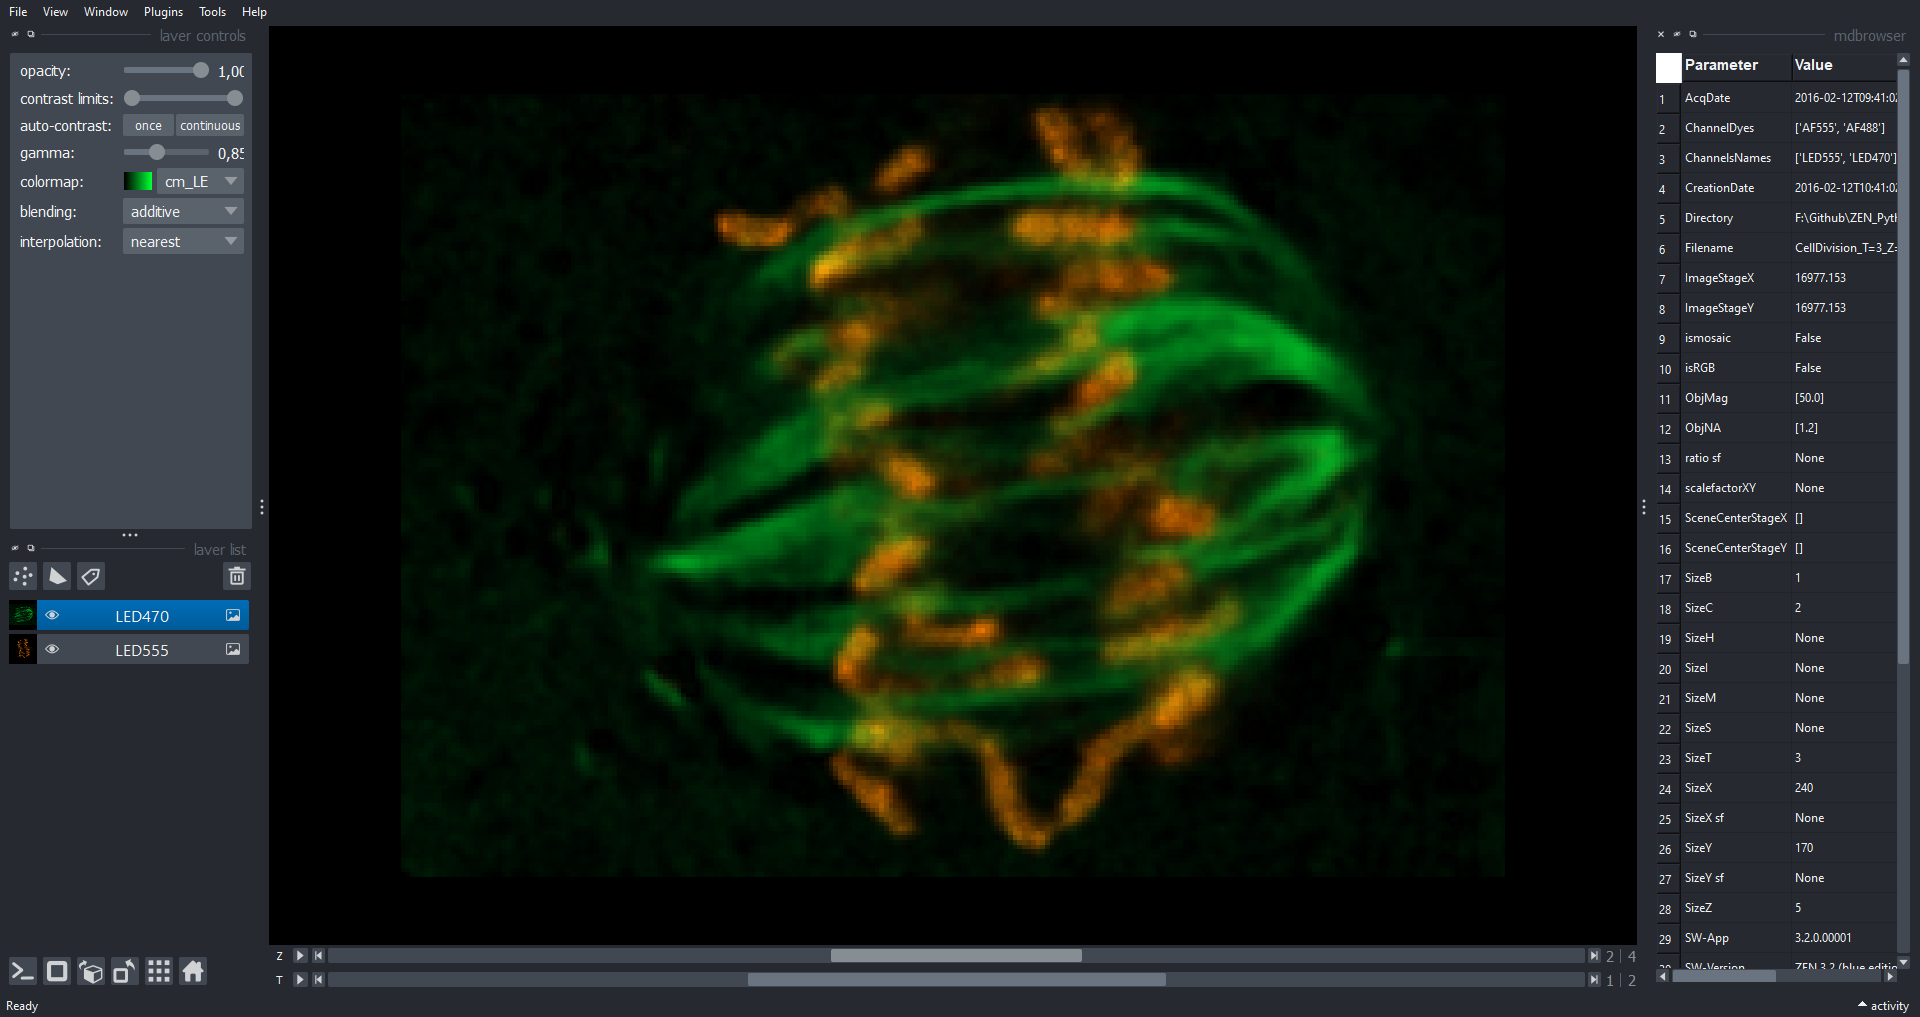

In [14]:
napari.utils.nbscreenshot(viewer)